<a href="https://colab.research.google.com/github/leedy40259/Ybigta_summer/blob/main/0728_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [2]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [3]:
x_train.shape 

(60000, 28, 28)

In [4]:
from keras.utils.np_utils import to_categorical

x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
# 각 element가 RGB 값이었는데 255로 나누어서 0과 1 사이의 값을 가지는 것 같음

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 이렇게 해야 logits and labels must have the same shape, received ((16, 10) vs (16, 1) 에러가 안뜸
# 결과값 one-hot coding

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [5]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape
# MLP에서는 1차원으로 쭉 펴서 입력층에 넣기 때문

((60000, 784), (10000, 784))

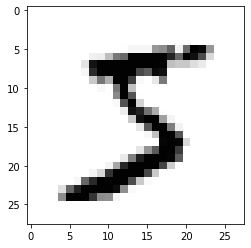

In [6]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28, 28)).set_cmap('Greys')
# train set의 첫 번째(index 0) 데이터 확인해보기. 쭉 폈던 걸 다시 원래 이미지 형태로 reshape해야 함

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [7]:
y_train.shape

(60000, 10)

In [8]:
# show MNIST label for above data
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [9]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [10]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

from keras.models import Sequential
from keras.layers import Dense, Dropout



model = Sequential()
# input layer
model.add(Dense(256, input_dim = 784, kernel_initializer = initializer_list[4], activation = activation_list[1]))
model.add(Dropout(dropout_rate))
# hidden layer 1(hidden layer부터는 input_dim 따로 설정 안해도 됨)
model.add(Dense(50, kernel_initializer  = initializer_list[5], activation = activation_list[1]))
model.add(Dropout(dropout_rate))
# hidden layer 2
model.add(Dense(10, kernel_initializer  = initializer_list[5], activation = activation_list[1]))
model.add(Dropout(dropout_rate))
# hidden layer 3
model.add(Dense(50, kernel_initializer  = initializer_list[5], activation = activation_list[1]))
model.add(Dropout(dropout_rate))
# hidden layer 4
model.add(Dense(50, kernel_initializer  = initializer_list[5], activation = activation_list[1]))
model.add(Dropout(dropout_rate))
# output layer (activation function은 softmax function)
number_of_class = 10
model.add(Dense(number_of_class, activation = 'sigmoid'))

# compile (loss function과 optimizer, metrics 정함)
# metrics: funciton that is used to judge the performance of your model
model.compile(loss = loss_list[2],
              optimizer = optimizer_list[2],
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                12850     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 50)               

model을 자유롭게 train 해봅시다.  

In [12]:
model.fit(x_train, y_train, batch_size = 16, epochs = 50)

Epoch 1/50
3750/3750 [==============================] - 17s 4ms/step - loss: 0.1690 - accuracy: 0.6503
Epoch 2/50
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1095 - accuracy: 0.8205
Epoch 3/50
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1000 - accuracy: 0.8426
Epoch 4/50
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0980 - accuracy: 0.8470
Epoch 5/50
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0988 - accuracy: 0.8506
Epoch 6/50
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0992 - accuracy: 0.8519
Epoch 7/50
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1005 - accuracy: 0.8545
Epoch 8/50
3750/3750 [==============================] - 13s 4ms/step - loss: 0.1006 - accuracy: 0.8543
Epoch 9/50
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1039 - accuracy: 0.8536
Epoch 10/50
3750/3750 [==============================] - 14s 4ms/step - l

95%이상의 성능을 가진 모델을 만들면 완성!

In [13]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0579 - accuracy: 0.9436 - 839ms/epoch - 3ms/step

Accuracy: 0.9435999989509583


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)